### Exercise 1

1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [2]:
import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.common.exceptions import ElementNotInteractableException
from bs4 import BeautifulSoup
import requests
import urllib
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

In [2]:
#connecting with the web driver
driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")

In [3]:
#getting the url
driver.get("https://www.amazon.in/")

In [4]:
#sending key words from the search box
search_box = driver.find_element_by_id('twotabsearchtextbox').send_keys("Laptop")

#clicking the search button
search_button = driver.find_element_by_id("nav-search-submit-text").click()

#asking driver to wait
driver.implicitly_wait(5)

### Exercise 2

2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [4]:
#defining the function
def amazon_laptop(url):
    
    #opening the webdriver
    driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")
    
    #creating lists
    start_page=0
    end_page=3
    urls=[]
    name=[]
    rating=[]
    price=[]
    image_url=[]
    
    #writing for loops to fetch the urls
    for page in range(start_page,end_page):
        driver.get(url)
        soup= BeautifulSoup(driver.page_source,'html.parser')
        prod_urls = soup.find_all('a',attrs={'class':'a-link-normal a-text-normal'})
        for prod in prod_urls:
            urls.append('https://www.amazon.in'+prod.get('href'))
            
    for url in urls:
        driver.get(url)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        #geting tags for the names
        name_tags = soup.find('h1',attrs={'id':'title'})
        
        #fetching text element from the name_tags
        if name_tags is not None:
            name.append( name_tags.find('span').text.replace('\n',''))
        else:
            name.append('-')
            
        #getting tags for the ratings
        rating_tags = soup.find('span', attrs = {'class':'a-size-medium a-color-base a-text-beside-button a-text-bold'})
        
        #fetching text element from the rating_tags
        if rating_tags is not None:
            rating.append(rating_tags.find('i').find('span').text)
        else:
            rating.append('-')
        
        #getting tags for the prices
        price_tags = soup.find('span', attrs = {'class':'a-price-whole'})
        
        #fetching text element from the price_tags
        if price_tags is not None:
            price.append(price_tags.find('span').text)
        else:
            price.append('-')
            
        #getting tags for the image urls
        img_tags = soup.find('div', attrs = {'class':'imgTagWrapper'})
        
        #fetching image urls
        if img_tags is not None:
            image_url.append(img_tags.find('img').get('src'))
        else:
            image_url.append('-')
          
    
    #creating a dataframe
    mob_df = df=pd.DataFrame({'Name':name,
                              'Price':price,
                              'Rating':rating,
                              'Image_link':image_url})

#calling the above defined function
amazon_laptop('https://www.amazon.in/s?k=laptop&ref=nb_sb_noss')

WebDriverException: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: chrome=88.0.4324.190)


### Exercise 3

3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [3]:
#connecting with the web driver
driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")

In [4]:
#getting the url
driver.get("https://images.google.com/")

In [9]:
#finding tags and sending keys for the search box
search_box = driver.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys("Fruits")

#clicking the search button
search_button = driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']").click()

In [10]:
#finding image tags
image_tags = driver.find_elements_by_tag_name("img")













https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSisFKrNtmCzWMt4LwMEtnRojOYwY6fInXl77aazoplm0XKyKY&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7X584xCnkZY0F7VqbLIjvCA6mWjzxavkKFOnm6jEx3e2H04hn&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcReltGaQ_A280RrHGEqbMpAWVQP7H9OQ4nAXTLuKOOz9GQV7kzA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTS8xKHWZlAgS9ml3GRLXERz8slD4D3_t2S0yggfPUfwwRZuQkJ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhZf1ixxaiNyPs-AM2Q1-g30x81B9qD2NPb1ULn1mVIYdKcIFB&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRI1q2Vg3odhkawtZ4DRsuRpWsdHTes8uPLL47XRK3EcXmLapAj&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkLMVpRpt8YI79E8sU6uM1m8HXpLcxBjCvnxNH9nar9r_K7ge0&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdxETf2i4q9IM09kSssm6RrnSDRt3Z-g8Qf6eHoy5_Bj25-W1X&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuCeW5HzOCpHH6NFen6CHk
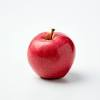
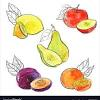
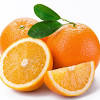
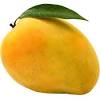
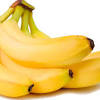
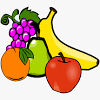
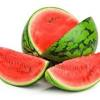
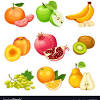
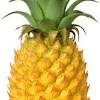
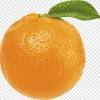
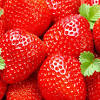
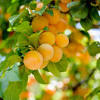

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTKy_8yVCWMiqhkYdHc3djPWUYt2zSF9fiSRcVuh-VWWXEEOOZ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDonZ66WU2dsZaHC2P2hvCIK6Xr2cKZIORKlHZhcE&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUC3VR01JKS9bwRLfX3Zyrq1b8X4lJJ1hqS8wsOpc&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhhUWapytBqnZtPD8RfAlaa_zvftU2P408gmdE_DI_UZUDUS8_&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRt-FOaOdwAMiTwBeY6QgBDmMLj7E70eBhAk3jrh80&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3__VHWdKRm_SaMsOv1XuRZASdcy7sx3bp9afU9pw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTl2ersuyobCsyfrXYSMGtSINiJYgAkeGmZJhL9jh5xg50HIAlP&usqp=CAU














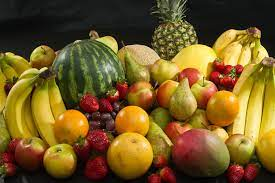
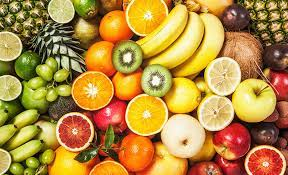
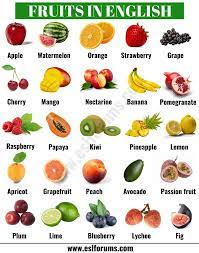
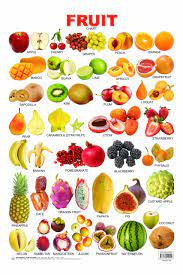
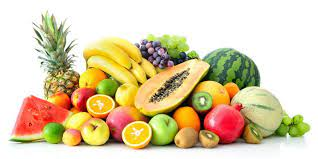
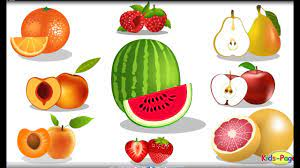
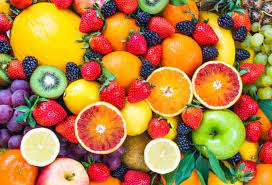
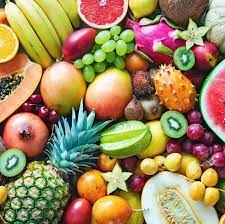
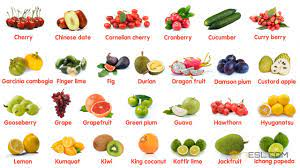
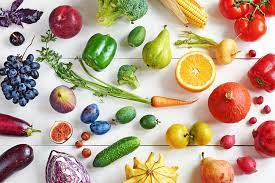
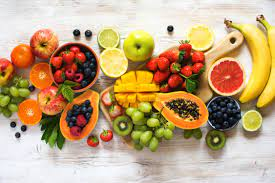
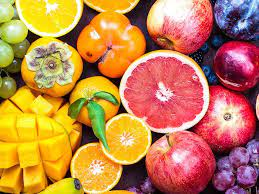
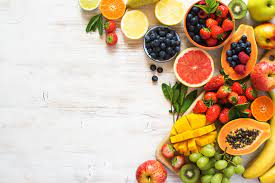








https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKfQuLBzNbAw4yd99gVQ1_Rc3kLUC8vM7ZNg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqLAeBdJ1DJrYU44TA01uFj-9wM-v5oFGA3w&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQndGzs9OXvCv1BC4j550PhbxjG6jvEq0xFOQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTukaZwXzOp-TwHUjKrN3xEUmnrNOFBlnJoLQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuietAb0sNGKMkPMFXJhoLdp3nqMEzAGrYdk9x0NQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIcM-WLqfOoB9GeGhfa_FBuO2FxSXoXhFl8ieLGI_oNzqe5b8w&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTl2YvTCjVgfcGESofZc3PPASDvCHNNxPtHmaoCpJ-ygAWf3Xp7&usqp=CAU
None
None
None
None

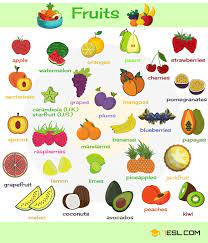
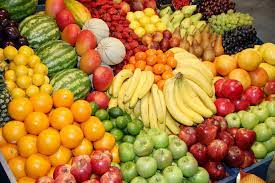
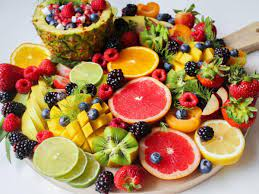
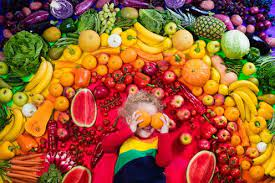
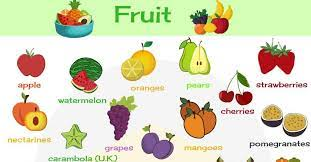
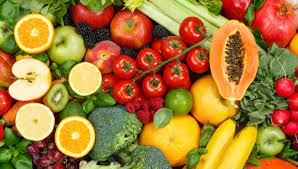
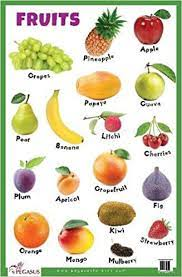

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [11]:
#fetching urls from the image tags
for image in image_tags:
    print(image.get_attribute('src'))

In [14]:
#connecting with the web driver
driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")

In [15]:
#getting the url
driver.get("https://images.google.com/?gws_rd=ssl")

In [16]:
#sending keys from the search box
search_box = driver.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys("cars")

#clicking the search button
search_button = driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']").click()

In [17]:
#getting tags for the image urls
image_tags = driver.find_elements_by_tag_name("img")













https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBzXjOEDXay_80zCfqbXdvjuq6e1Z21PeHRbAWU_LV2XLvxoq2&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoC8WRlMbF5g9S_ccFGaxZ6_QVVfd0m_lq3vmGdqs&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-4UkrDvXwncvKIueJgDUuHD6F2dQym9kzW5UfhdLWXAQ4ttlw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhhZCrsXSlQv9RcOmFJ9LPujiig0hBLwwXDyu3GEseSrlGwPj6&usqp=CAU

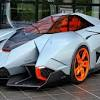
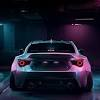
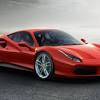
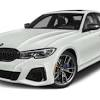
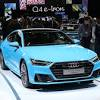
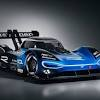
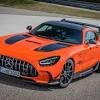
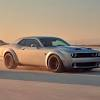
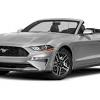
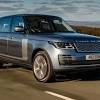
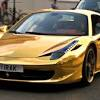
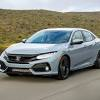

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSx_1y-YwbUIEhfsZom1zW0OU1inkKDg9KZEXsbs7E3ctOZfytd&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1ZHSJGD-wyYVZOvlsnQFT14yUvA0jYIRE058-4znRghgmub_t&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ_vG9L0gMcD4jVpfZ0twSkKCsIHZ3NBfJjY4c5gz-9ijGgDtOZ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRhiOIockkEf9YWwLX39I0VsPK6PYM6SzVlcYnkelmoCpQxi5uO&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6tFuSgw36h13QCNb9Nv_gQM2lZ2bUriFrfGQQMdk75j_iv_VI&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTe3uzHOkXCp-O2zTsaKjhWn-jlwmYj4kpfTSjSuZyr9WDAscLI&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4DWCmUKIYTAclw5DUXgwE6ueGa-6xObojoyxwHqMTbvw8YkMY&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRdvTJZ4JfCS9ydD-XFlz4qrJvqAPvna4L_0lFLJjJiHmDjJ0Xb&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-XLmyWpUGfj8WUcBLyfvQndJh43GaPtcI
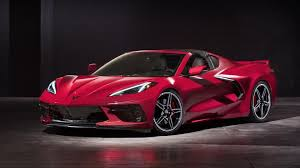
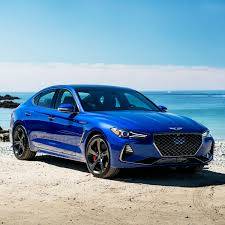
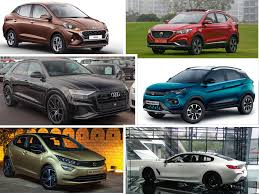
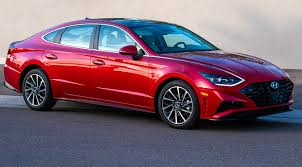
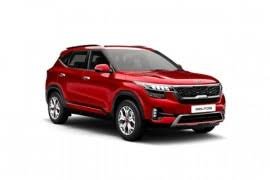
















https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSB0RVgb_wrMfuIxcjiD8MUVXA65kIQY-sUSA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAiDN7gQzQ454oFAECduD9XvO2mVsdBGvrzw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr6cDGx33MNBecyI34m9s5Uq1ErDJ6G-DXQA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLQkjdNsFkXvUwJhhOsJXEkte3R8AW8khX7Q&usqp=CAU

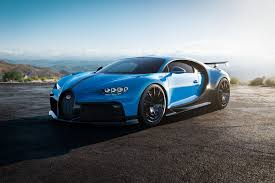
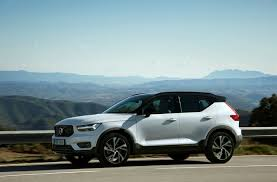
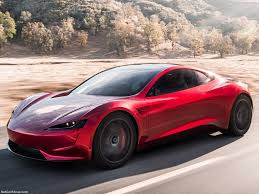
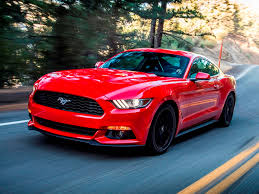
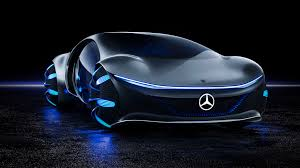
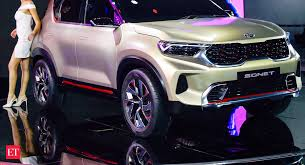
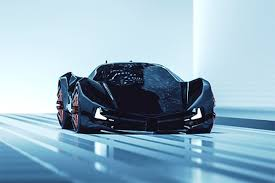
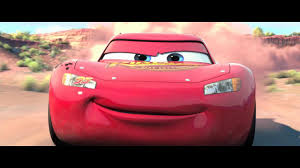
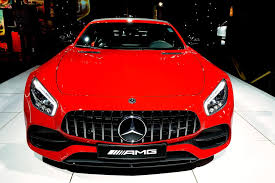
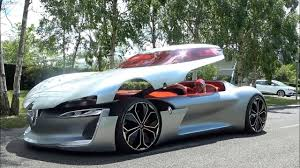
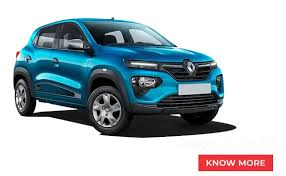
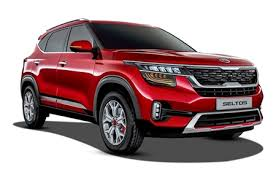
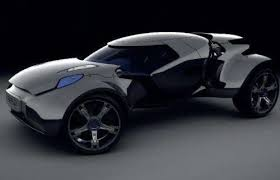
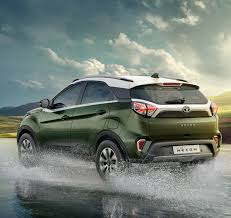
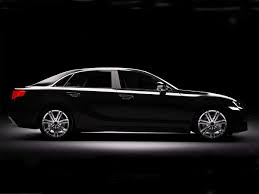

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZM1HYb-MYxImvoHrrLBohq7AQvxi7rIgQaZHmcudZk3hWSCiY&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBpKXLdJUuJIIarSz_m55D_okGzmbVRePGhYlA5voOPRuo_roQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnEnQXLmAF_bA-AERURzvnNcHLP0bdqWhAXG8ST5bme_bb73Pp&usqp=CAU
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [18]:
#fetching urls for the tags
for image in image_tags:
    print(image.get_attribute('src'))

In [23]:
#connecting with the web driver
driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")

In [24]:
#getting the url
driver.get("https://images.google.com/?gws_rd=ssl")

In [25]:
#sending keys to he search box
search_box = driver.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys("Machine Learning")

#clicking the search button
search_button = driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']").click()

In [26]:
#finding tags for the image urls
image_tags = driver.find_elements_by_tag_name("img")













https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLIr5jH_jmviA7fhKNAL60riHAlM2HmzNJEBX8Tv2BUQNyL8H-WXWVOdok-GEx_o9SrKluXcGKgw&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTP8BD4vtPEAvlRUow9Fmk1vAUXUgNGepYQOGZhodTKTjdOIo6oVWocm02ta0w6yca3m6uXKDIHGQ&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTyKSU5G8ECUiNG9OaqpKcF8fuaJ01iQ_4fbOLBOXgII3sbQ8C_dwnmd87efg1l1vxa6RpASNIOLg&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvOq4vgfb7ZGHSt2hzt9Tio5L_DFGYX7GnX5KNTKq3Nhj3-V2xv81W1GVUhjYBw2ZC11nL-iARYg&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUlCYngGTTolV2Yrnj2Soi5w2llIM4uiabO2vpk0TNkK7KYC9Erf6vIIANXtiSOrESWuKIOxSw_w&usqp=CAU&ec=45781601

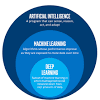
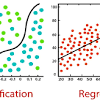
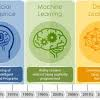
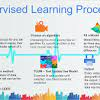
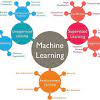
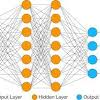
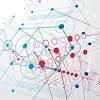
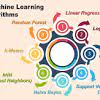
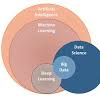
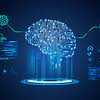
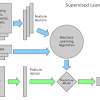
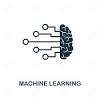

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS905fE5TTkF7a5XMuOtthavem2HbtUMSGgar_G9qwIFm5tqa2gIOgvQF9av8NSeRnX&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlLjvcd5RJWfBg2ZVTm4neAhyd64sWqCm9fJodfpgLrJQfnoMQ8Nf8uzCpcwY3hzu72ZMvqpzKYg&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNKYw3a75U9UD9prXLy9OYYwjmYyViXs0cc8rqydejYk2wpAEskI5OnAh1vckt7MpT48DpRB3_yA&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShEnjHhs2QT_b6aLRfceLa1EQ4uMD_R1RTGO4rBshNEzoSC9GAZwREJ6PMFoevTvq5XeMbo0Khkw&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJa6nE5978r7a5FWvJcQOFCPH4k8wM7U9XCBM2hJVjmp8IMvZhdTnLq7kjbcEQpD1H8glOhp_7tg&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcReX7GD3p5ZAbfspRgZBs17_-tdltc-2Uw2j01mFDOcYVTL4IFgAf3CBnbke735mpXwUEkQl2U38g&usqp=CAU&ec=45781601
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDHbgmGYNNkDAoj2xEVG8r23SgEi7pK1eL4jLdXvHGMJ
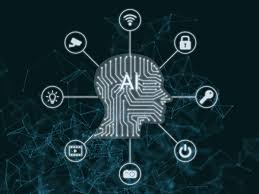
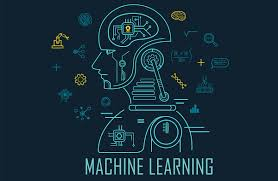
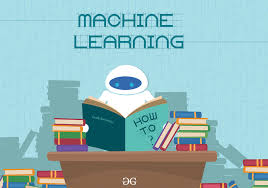
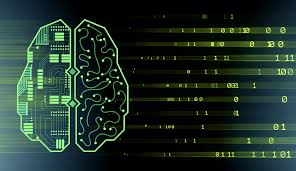
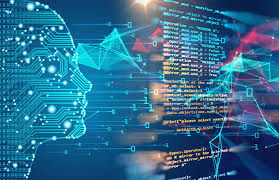
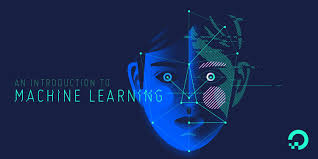
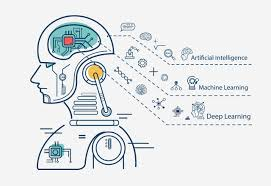
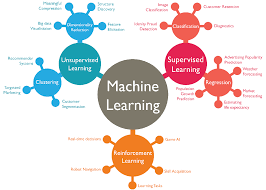













https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxVFK-XSgdT_lK95joMfDupTEhhpcMZ7590g&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbbJApZw5tX2V4c_T7DmgdnZ8M7vY6G3csBQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWgru6T-sgr3m-YtlRSCUFNhe32FASidvxYw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlrRupcFP48cR8T8Lv0nmohh-nsuFWuKy90Q&usqp=CAU
None
None
None
None
None
None
None
None
None

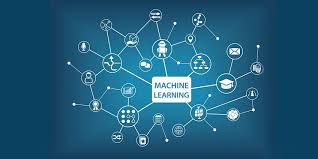
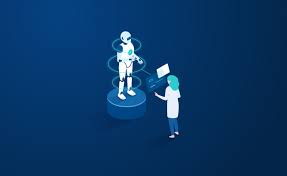
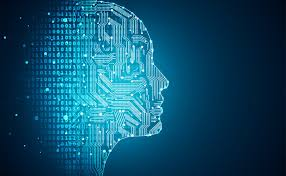
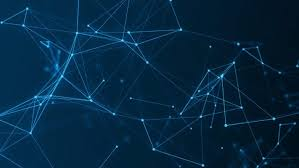
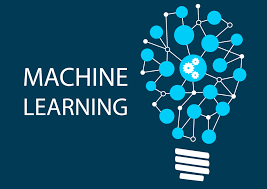
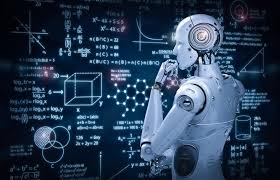
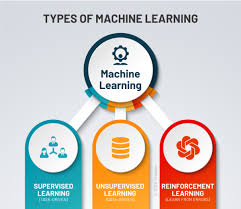
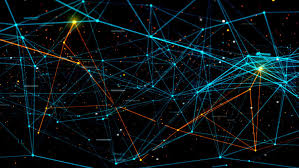
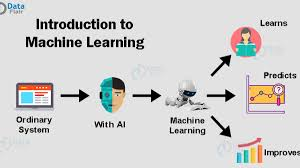
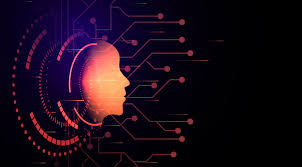
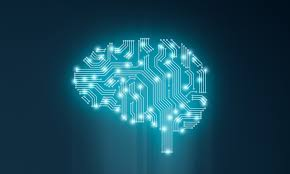
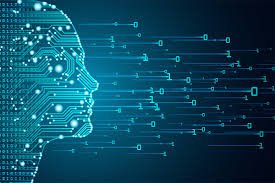

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [27]:
#getting url attributes from the tags
for image in image_tags:
    print(image.get_attribute('src'))

### Exercise 4

Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [5]:
#connecting with the web driver
driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")

#getting the url
driver.get("https://www.flipkart.com/")

#finding element for job search bar
search_bar=driver.find_element_by_class_name("_3704LK")

#clicking the searc button 
search_bar.send_keys("iphone 6")

#clicking the search button
search_btn=driver.find_element_by_class_name("L0Z3Pu")

#clicking the search button
search_btn.click()

In [6]:
#specific mobile item search
try:
    
    #getting tags for the seach bar
    search_mob=driver.find_element_by_class_name("_4rR01T")
    
    #clicking the search button 
    search_mob.click()

except ElementNotInteractableException as e:
    print("Exception Raised: ",e)
    
    #getting tags for the seach bar
    search_mob=driver.find_element_by_class_name("_4rR01T")
    
    #clicking the search button
    search_mob.click()

In [24]:
#creating empty list
brand_phone_colour=[]
camera_ram_display_processor=[]
price=[]
url=[]

In [9]:
#getting list items tags
driver.get("https://www.flipkart.com/apple-iphone-6-space-grey-16-gb/p/itmefjg7mzcwjyhk?pid=MOBEYHZ2YAXZMF2J&lid=LSTMOBEYHZ2YAXZMF2JEVWVNC&marketplace=FLIPKART&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=b5e04f05-6dbb-4b08-aaa0-f48a692a49ec.MOBEYHZ2YAXZMF2J.SEARCH&ppt=hp&ppn=homepage&ssid=wpd0wnizfk0000001614167057835&qH=c5986779727a5087")

#asking driver to  wait for 5 seconds
delay=10 

#using driver delay
WebDriverWait(driver,delay).until(EC.presence_of_element_located((By.CLASS_NAME,'B_NuCI')))

#finding tags for the phone specifics
brand_phone_colour_tags=driver.find_elements_by_xpath("//span[@class='B_NuCI']")

#calling the defined variable
brand_phone_colour_tags

[<selenium.webdriver.remote.webelement.WebElement (session="234361b53797209a42a1972d477ad767", element="26087e91-f576-4e82-b765-1427175dfb2f")>]

In [10]:
#getting text element from the tags
for i in brand_phone_colour_tags:
    if i.text is None :
        brand_phone_colour.append("--") 
    else:
        brand_phone_colour.append(i.text)
brand_phone_colour 

['Apple iPhone 6 (Space Grey, 16 GB)']

In [11]:
#getting tags for the phone specifics
WebDriverWait(driver,delay).until(EC.presence_of_element_located((By.CLASS_NAME,'_21Ahn-')))
camera_ram_display_processor_tags=driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
camera_ram_display_processor_tags

[<selenium.webdriver.remote.webelement.WebElement (session="234361b53797209a42a1972d477ad767", element="73db404d-47c0-4b4e-980f-9183301faf18")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234361b53797209a42a1972d477ad767", element="1b99adfb-ab85-4e43-b869-b8b8373ebd56")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234361b53797209a42a1972d477ad767", element="9e309210-4231-45b1-9fef-229348250746")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234361b53797209a42a1972d477ad767", element="fd0ee474-5254-444f-b6a5-9685ecfaf822")>]

In [12]:
#getting text element from the tags
for i in camera_ram_display_processor_tags:
    if i.text is None :
        camera_ram_display_processor.append("--") 
    else:
        camera_ram_display_processor.append(i.text)
camera_ram_display_processor

['16 GB ROM',
 '11.94 cm (4.7 inch) Retina HD Display',
 '8MP Rear Camera | 1.2MP Front Camera',
 'Apple A8 64-bit processor and M8 Motion Co-processor']

In [15]:
#using a delay for 5 seconds
delay=5

#getting the price tags and applying time out exceptions
try:
    WebDriverWait(driver,delay).until(EC.presence_of_element_located((By.CLASS_NAME,'_30jeq3 _16Jk6d')))
    price_tags=driver.find_elements_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
    print(price_tags)
except TimeoutException as e:
    print('Exception Raised: ',e)
    price_tags=driver.find_elements_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
    print(price_tags)

Exception Raised:  Message: 

[<selenium.webdriver.remote.webelement.WebElement (session="234361b53797209a42a1972d477ad767", element="2c987357-b41c-4ed3-876e-d2bba74cc82d")>]


In [16]:
#getting text element from the price tags
for i in price_tags:
    if i.text is None :
        price.append("--") 
    else:
        price.append(i.text)
price

['₹52,000']

In [18]:
#gatting tags for the image urls
delay=5
try:
    WebDriverWait(driver,delay).until(EC.presence_of_element_located((By.CLASS_NAME,'_396cs4 _2amPTt _3qGmMb  _3exPp9')))
    url_tags=driver.find_elements_by_xpath("//img[@class='_396cs4 _2amPTt _3qGmMb  _3exPp9']")
    url_tags
except TimeoutException as e:
    print('Exception Raised: ',e)
    url_tags=driver.find_elements_by_xpath("//img[@class='_396cs4 _2amPTt _3qGmMb  _3exPp9']")
    url_tags

Exception Raised:  Message: 



### Exercise 5

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [32]:
#connecting with the web driver
driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")

In [33]:
#getting the url
driver.get("https://www.google.com/maps/@12.9807806,77.6421572,15z")

In [34]:
#creating an empty lists
lat_lon=[]

In [35]:
#sending keys in the search box
search_box = driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']").send_keys("Pondicherry")

#clicking the search button 
search_button = driver.find_element_by_xpath("//button[@id='searchbox-searchbutton']").click()

In [39]:
#finding tags for the latitudes and longitudes
lon_lat_tags=driver.find_elements_by_xpath("//button[@class='link-like widget-reveal-card-lat-lng']")
lon_lat_tags

[<selenium.webdriver.remote.webelement.WebElement (session="a66ed487858cc9a2b5f34c34bced33a0", element="0cb77c53-74e0-4e9e-8175-a2ee4c92bb71")>]

In [40]:
#finding text element from the latitiues and longitudes tags
for i in lon_lat_tags:
    if i.text is None :
        lat_lon.append("--") 
    else:
        lat_lon.append(i.text)
lat_lon

['11.930583, 79.791726']

### Exercise 6

6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [43]:
#connecting with the web driver
driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")

In [44]:
#getting the url
driver.get("https://trak.in/india-startup-funding-investment-2015/")

In [45]:
#creating empty lists
july=[]
aug=[]
sep=[]

In [46]:
#getting tags for the below july month
july_tags=driver.find_elements_by_xpath("//div[@id='tablepress-48_wrapper']")

#getting tags for the below august month
aug_tags=driver.find_elements_by_xpath("//div[@id='tablepress-49_wrapper']")

#getting tags for the below september month
sep_tags=driver.find_elements_by_xpath("//div[@id='tablepress-50_wrapper']")

In [47]:
#getting text element from the july tags
for i in july_tags:
    if i.text is None :
        july.append("--") 
    else:
        july.append(i.text)
july

["Show\n10\n25\n50\n100\nentries\nSearch:\nSr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD)\n1 15/07/2020 Flipkart E-commerce E-commerce Bangalore Walmart Inc\nM&A 1,200,000,000\n2 16/07/2020 Vedantu EduTech Online Tutoring Bangalore Coatue Management Series D 100,000,000\n3 16/07/2020 Crio EduTech Learning Platform for Developers Bangalore 021 Capital pre-Series A 934,160\n4 14/07/2020 goDutch FinTech Group Payments Mumbai Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq. Seed 1,700,000\n5 13/07/2020 Mystifly\nAirfare Marketplace Ticketing, Airline Retailing, and Post-Ticketing Services Singapore and Bangalore Recruit Co. Ltd.\n\npre-Series B 3,300,000\n6 09/07/2020 JetSynthesys Gaming and Entertainment Gaming and Entertainment\n\nPune Adar Poonawalla and Kris Gopalakrishnan.\nVenture-Series Unknown 400,000\n7 10/07/2020 gigIndia\nMarketplace Crowd Sourcing, Freelanc

In [48]:
#getting text element from the august tags
for i in aug_tags:
    if i.text is None :
        aug.append("--") 
    else:
        aug.append(i.text)
aug

["Show\n10\n25\n50\n100\nentries\nSearch:\nSr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD)\n1 15/08/2020 Practo HealthTech Health care and Wellness Bangalore A1A Company\nSeries F 32,000,000\n2 13/08/2020 Medlife E-commerce Online Pharmacy Bangalore Prasid Uno Family Trust and SC Credit Fund 23,000,000\n3 13/08/2020 HungerBox\nFoodTech Online Food Delivery Service Bangalore One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar Series D1 1,560,000\n4 04/08/2020 Dunzo Hyper-local Logistics Online Delivery Services Bangalore Existing Backers In Progress 30,000,000\n5 11/08/2020 Terra.do EduTech Online Climate School, E-learning Stanford, California, Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital\n\nSeed 1,400,000\n6 12/08/2020 Classplus EduTech E-learning, Online Tutoring\n\nNoida Falcon Edge In Progress upto 15,000,000\n7 14/08/2020 Niyo FinTec

In [49]:
#getting text element from the september tags
for i in sep_tags:
    if i.text is None :
        sep.append("--") 
    else:
        sep.append(i.text)
sep

["Show\n10\n25\n50\n100\nentries\nSearch:\nSr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD)\n1 08/09/2020 Byju’s EduTech Online Tutoring Bangalore Silver Lake, Tiger Global, General Atlantic and Owl Ventures\nPrivate Equity 500,000,000\n2 12/09/2020 mCaffeine Personal Care Skincare & Haircare Mumbai Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1 Series B 3,000,000\n3 09/09/2020 Qshala EduTech Online Curiosity Platform for Kids Bangalore Rainmatter Capital Angel 370,000\n4 02/09/2020 Winzo Online Gaming Online Gaming New Delhi Kalaari Capital Partners, IndigoEdge Management Consultancy Series B 15,500,000\n5 09/09/2020 Hippo Video Video Customer Experience(CX) Platform Video Customer Experience(CX) Platform Newark, Delaware, United States of Amercia Alpha Wave Incubation, Exfinity Venture Partners and existing backers.\nSeries A 4,500,000\n6 07/09/20

### Exercise 7

Write a program to scrap all the available details of top 10 gaming laptops from digit.in.

In [5]:
#connecting with the web driver
driver=webdriver.Chrome("C:\Program Files\chromedriver.exe")

In [6]:
#getting the url
driver.get("https://www.digit.in/search/")

In [7]:
#finding tags for the search box
search_bar=driver.find_element_by_xpath("//input[@class='form-control']")

#sending keys from the search bar
search_bar.send_keys("Top 10 Gaming Laptops")

In [8]:
#finding tags for the click button
search_click=driver.find_element_by_id("searchgetId")

#clicking the search button
search_click.click()

In [9]:
#gettin the required url
driver.get("https://www.digit.in/top-products/best-gaming-laptops-40.html")

In [10]:
#creating empty lists
name=[]
other_details=[]

In [11]:
#finding tags for the names
name_tags=driver.find_elements_by_tag_name("h3")

#finding tags for the other details
other_details_tags=driver.find_elements_by_xpath("//div[@class='value']")

In [12]:
#getting text element from the name tags
for i in name_tags:
    if i.text is None :
        name.append("--") 
    else:
        name.append(i.text)
name

['MSI GT76 TITAN DT 9SG',
 'ALIENWARE 17 AREA-51M',
 'HP OMEN 15 2020',
 'ASUS ZEPHYRUS G14',
 'LENOVO LEGION Y540',
 'ASUS ROG ZEPHYRUS G GA502',
 'ASUS ROG ZEPHYRUS S GX531',
 'MSI GT83VR 7RE TITAN SLI',
 'ASUS ROG ZEPHYRUS DUO 15',
 'DELL G3']

In [15]:
#getting text element from the other details tags
for i in other_details_tags:
    if i.text is None :
        other_details.append("--") 
    else:
        other_details.append(i.text)
other_details

['WINDOWS 10 PRO',
 '17.3" (UHD 3840X2160)',
 'INTEL 9TH GEN CORE I9-9900K | 5000 MHZ',
 '1 TB HDD/64 GBGB DDR4',
 'WINDOWS 10 PRO',
 '17.3" (FHD (1920 X 1080))',
 'INTEL 9TH GEN CORE I9-9900K | 5000 MHZ',
 '1 TB PCIE SSD/32GB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'INTEL I7-10750H 10TH GEN | 1.6GHZ',
 '512 GB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '14" (1920 X 1080)',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 '9TH GENERATION CORE INTEL I7-9750H | 2.6 GHZ',
 '1 TB SSD/8GB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN 7 QUAD CORE 3750H | 2.3 GHZ',
 '512 GB SSD/16GB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 '9TH GEN INTEL CORE I7-8750H | 2.2 GHZ',
 '512GB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME 64 BIT',
 '18.4" (1920 X 1080)',
 'INTEL CM238 CORE I7-7820HK+CM238 7TH GEN | 3.5GHZ',
 '1.5 TB SATA/64GB DDR4',
 'WINDOWS 10',
 '15.6" (3840 X 1100)',
 'INTEL CORE I7 10TH GEN 10875H | NA',